In [1]:
%load_ext autoreload
%autoreload 2
import torch
from torch.utils.data import TensorDataset, DataLoader, StackDataset
from torch import nn
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import hist

import sys
sys.path.append("..")
from dnn.ak_sample_loader import *
from dnn.torch_dataset import *
from dnn.training import *
from dnn.validation import *

In [2]:
input = AkSampleLoader.loadFromPickle("/grid_mnt/data_cms_upgrade/cuisset/ticlRegression/PionSamples/fullData.pkl")

In [3]:
from dnn.model import *
hists = inferenceOnSavedModel("/grid_mnt/data_cms_upgrade/cuisset/ticlRegression/models/v1.pt", BasicDNN(), input)

In [4]:
#doFullValidation("/grid_mnt/data_cms_upgrade/cuisset/ticlRegression/models/v1.pt", BasicDNN(), input)

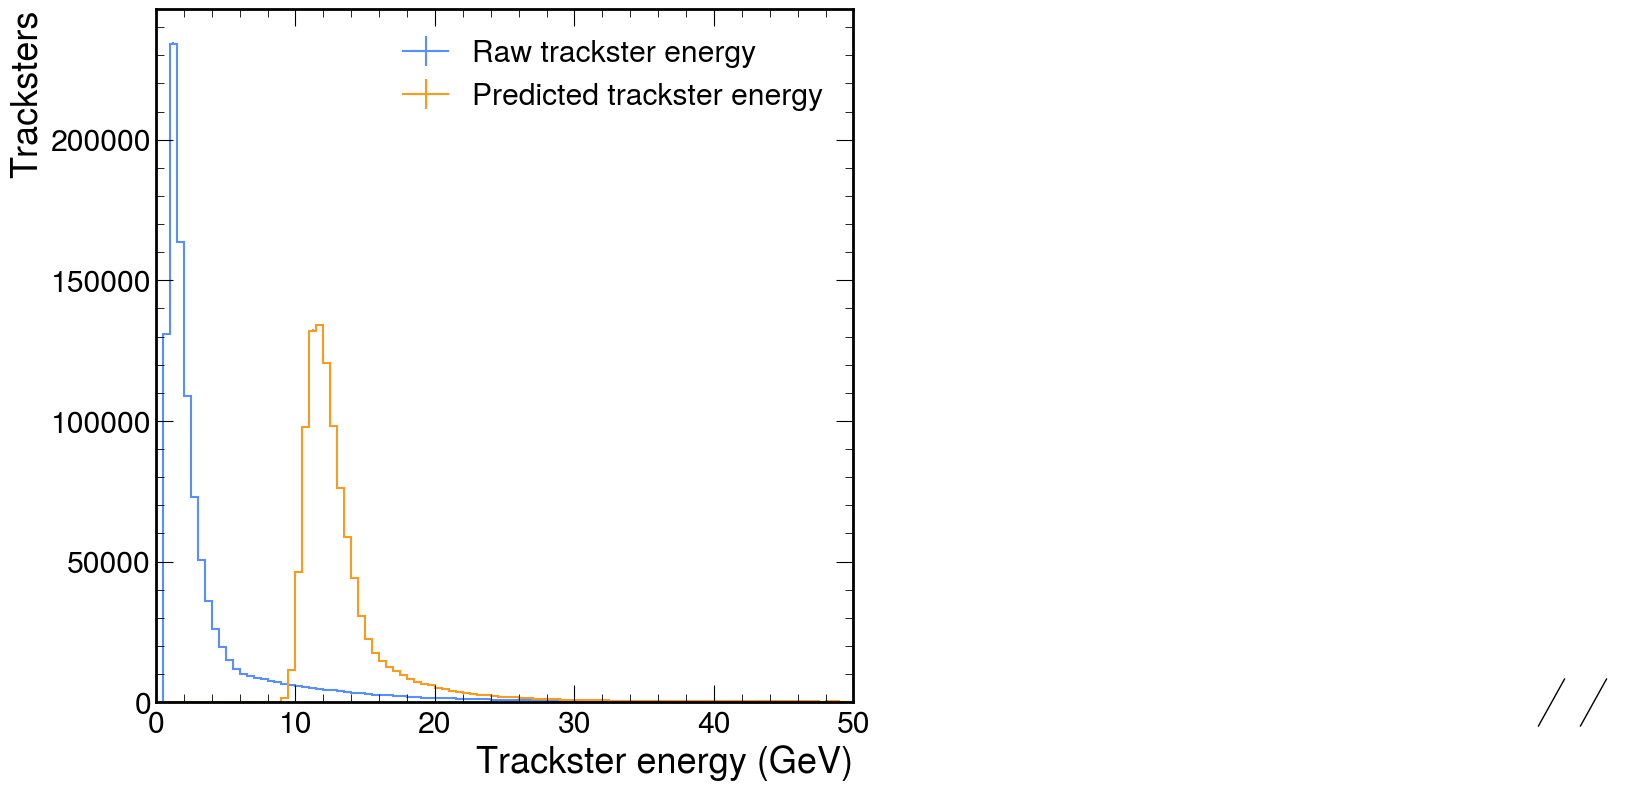

In [5]:
plotTracksterEnergies(hists)

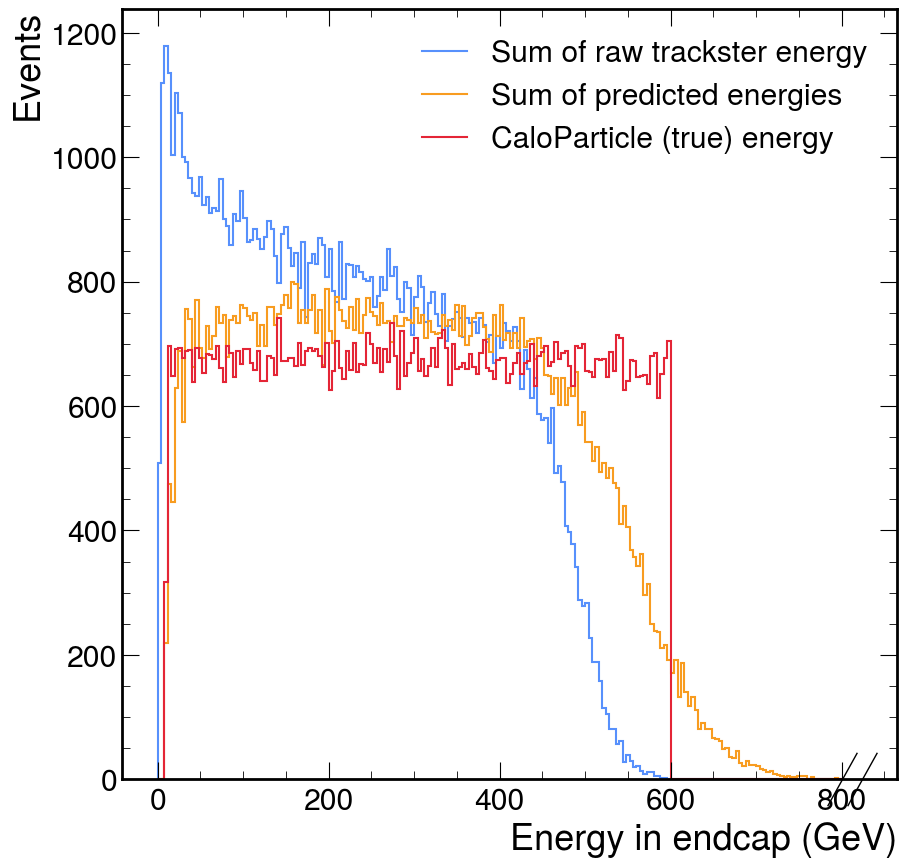

In [6]:
plotFullEnergies(hists)

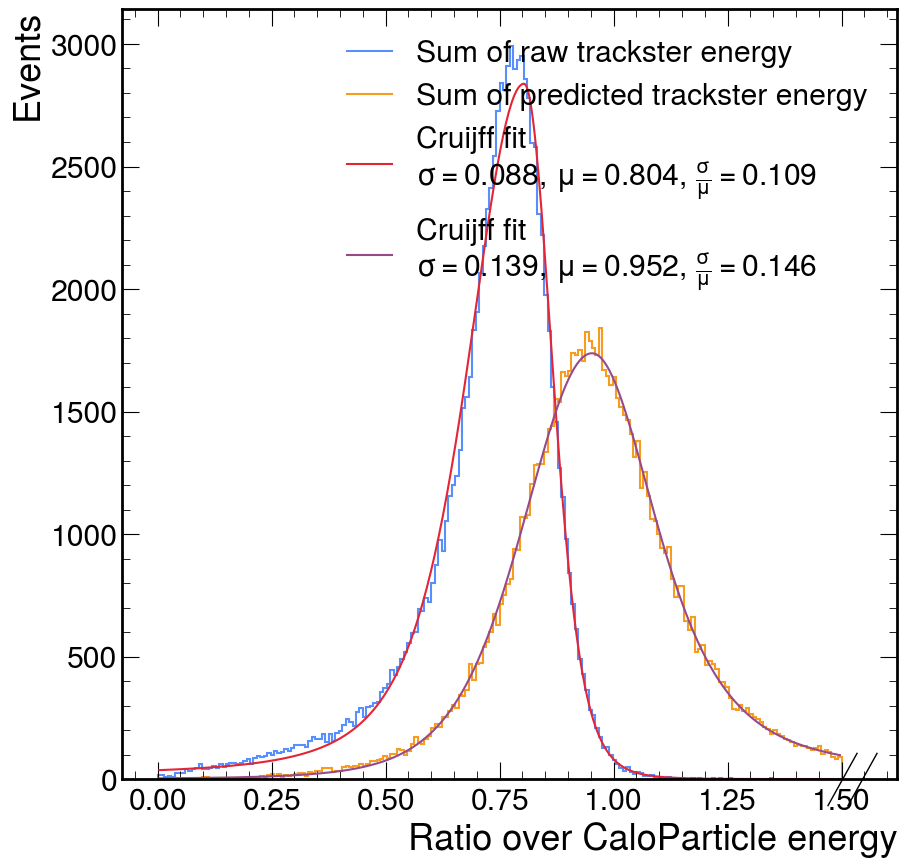

In [13]:
plotRatioOverCP(hists)